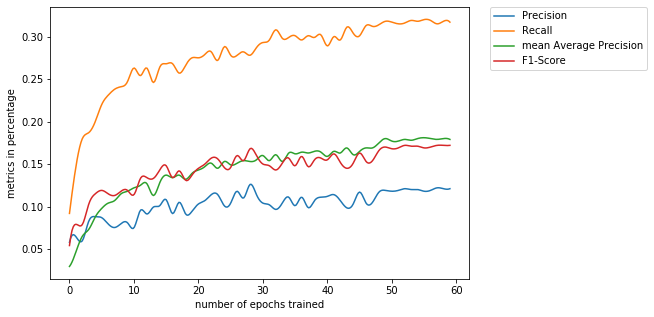

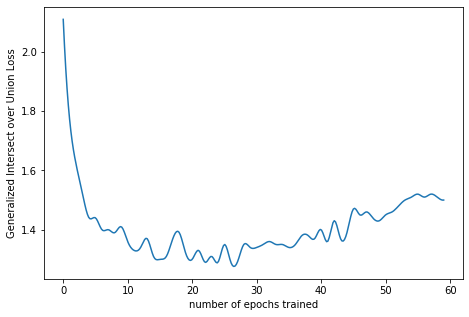

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

%matplotlib inline

with open("results_50epochs.txt") as f:
    results = f.read()

def smooth(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)
    return x_new, spl(x_new)

epoch = []
precision = []
recall = []
mAP = []
F1 = []
loss = []
for line in results.split("\n"):
    if line == "":
        continue
    values = line.split()
    epoch.append(float(values[0].split("/")[0]))
    precision.append(float(values[9]))
    recall.append(float(values[10]))
    mAP.append(float(values[11]))
    F1.append(float(values[12]))
    loss.append(float(values[13]))

epoch = np.array(epoch)
precision = np.array(precision)
recall = np.array(recall)
mAP = np.array(mAP)
F1 = np.array(F1)
loss = np.array(loss)

plt.figure(figsize=(7.5,5))
plt.plot(*smooth(epoch, precision), label="Precision")
plt.plot(*smooth(epoch, recall), label="Recall")
plt.plot(*smooth(epoch, mAP), label="mean Average Precision")
plt.plot(*smooth(epoch, F1), label="F1-Score")
plt.xlabel("number of epochs trained")
plt.ylabel("metrics in percentage")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("Metrics_train.jpg")

plt.figure(figsize=(7.5, 5))
plt.xlabel("number of epochs trained")
plt.ylabel("Generalized Intersect over Union Loss")
plt.plot(*smooth(epoch, loss))
plt.savefig("GIoU_loss.jpg")

In [44]:
with open("results_classes_50epochs.txt") as f:
    results = f.read()

traffic_light = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
traffic_sign = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
car = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
person = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
bus = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
truck = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
rider = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
bike = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
motor = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
train = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}

classes = [traffic_light, traffic_sign, car, person, bus, truck, rider, bike, motor, train]

for i, line in enumerate(results.split("\n")):
    if line == "":
        continue
    values = line.split()[-4:]
    cls_idx = i%10
    classes[cls_idx]["Pr"].append(float(values[0]))
    classes[cls_idx]["Rec"].append(float(values[1]))
    classes[cls_idx]["mAP"].append(float(values[2]))
    classes[cls_idx]["mF1"].append(float(values[3]))

Results for Pr :


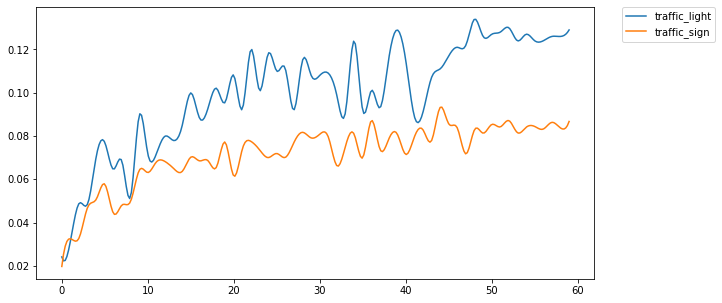

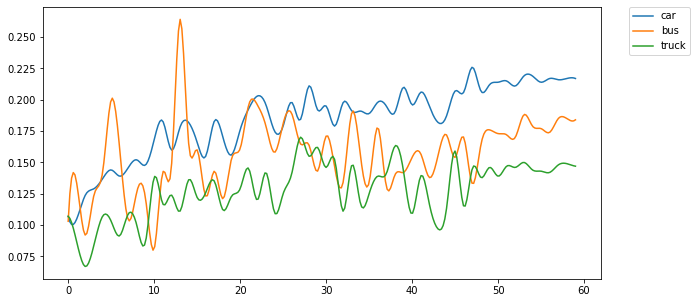

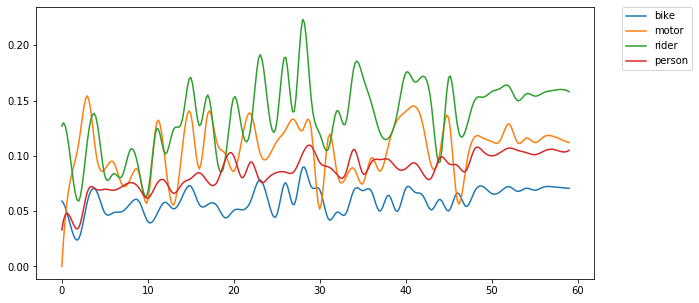

Results for Rec :


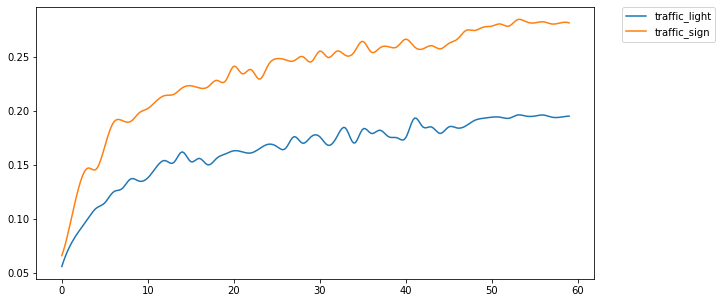

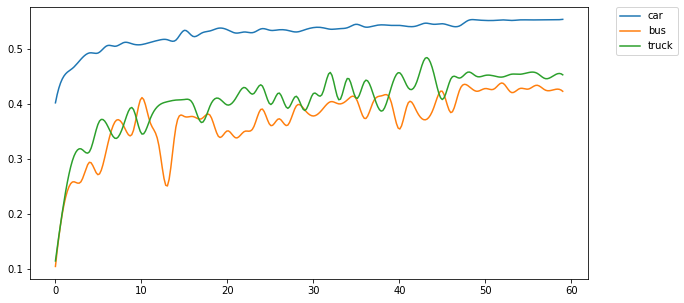

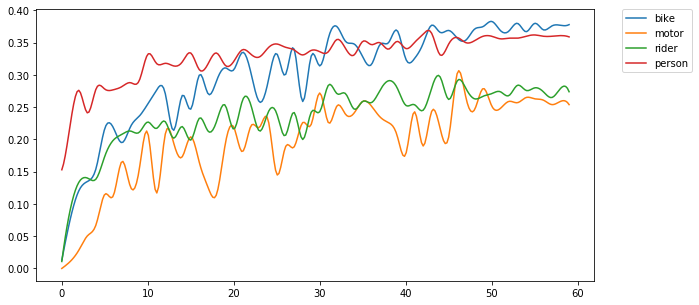

Results for mAP :


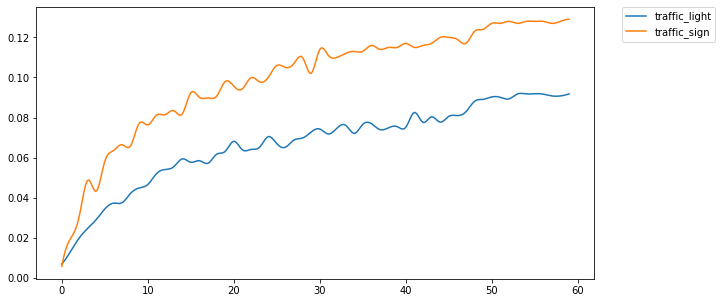

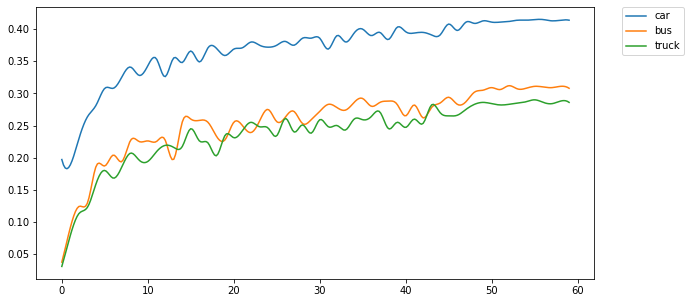

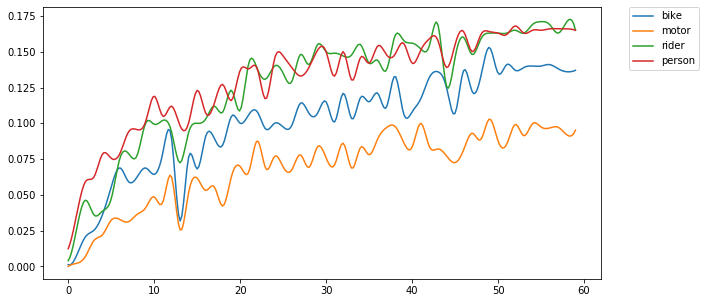

Results for mF1 :


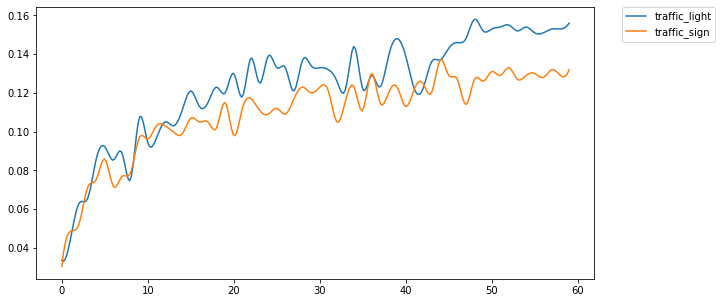

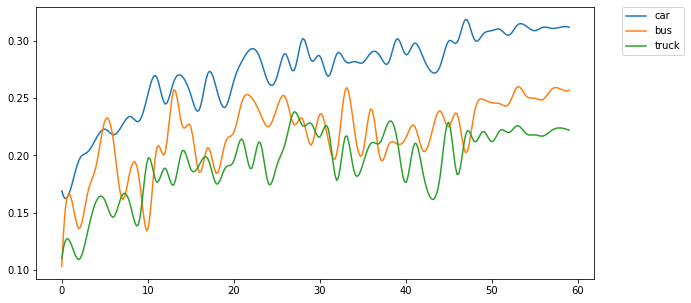

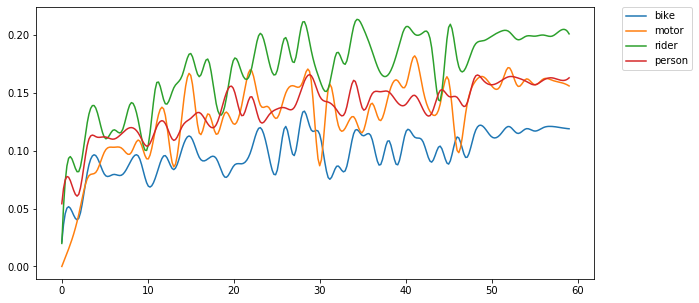

In [78]:
import inspect

epochs = np.arange(60)

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

metrics = ["Pr", "Rec", "mAP", "mF1"]
groups = [[traffic_light, traffic_sign], [car, bus, truck], [bike, motor, rider, person]]
for metric in metrics:
    print("Results for", metric, ":")
    for group in groups:
        plt.figure(figsize=(10,5))
        for cls in group:
            plt.plot(*smooth(epochs, cls[metric]), label=retrieve_name(cls)[0])
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()



